In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ashish/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
df = pd.read_csv('input/tweets_of_f234_users_1663839312.csv')

In [44]:
df['account_type'].value_counts()

human    371791
bot      116846
Name: account_type, dtype: int64

In [4]:
df

,userid,account_type,clean_tweet
0,787405734442958848,bot,"We can put the ""River"" in ""Screwdrivers"" https..."
1,787405734442958848,bot,"You can't extract the ""Pong"" from ""Sponged"" ht..."
2,787405734442958848,bot,"Put the ""Nope"" back in ""Inoperative"" https://t..."
3,787405734442958848,bot,"We can't spell ""Artworks"" without ""Two"" https:..."
4,787405734442958848,bot,"You can be the ""She"" in ""Astonished"" https://t..."
...,...,...,...
488632,3077047801,bot,A Tribute – Joan Rivers on Fitness http://t.co...
488633,3077047801,bot,Live in Orlando area? Want a personal trainer?...
488634,3077047801,bot,If you're trying to get fit keep working. You...
488635,3077047801,bot,Ready for summer? Cheap cool sunglasses - loo...


In [5]:
userid_accountype = df[['userid', 'account_type']].drop_duplicates()

In [6]:
userid_accountype['account_type'].value_counts()

human    146
bot       71
Name: account_type, dtype: int64

In [7]:
%%time
# Wall time: 1min 41s
pred = []
vader_label = []
sid = SentimentIntensityAnalyzer()
for sentence in df['clean_tweet'].values:
       
    ss = sid.polarity_scores(sentence)
    
    pred.append(ss['compound'])
    
    if(ss['compound'] < 0.05 and ss['compound'] > -0.05):
        vader_label.append('neutral')
    elif(ss['compound'] >= 0.05):
        vader_label.append('positive')
    elif(ss['compound'] <= -0.05):
        vader_label.append('negative')

CPU times: user 2min 40s, sys: 2 s, total: 2min 42s
Wall time: 2min 42s


In [8]:
df['vader_sentiment'] = pred
df['vader_label'] = vader_label

In [9]:
df

,userid,account_type,clean_tweet,vader_sentiment,vader_label
0,787405734442958848,bot,"We can put the ""River"" in ""Screwdrivers"" https...",0.0000,neutral
1,787405734442958848,bot,"You can't extract the ""Pong"" from ""Sponged"" ht...",0.0000,neutral
2,787405734442958848,bot,"Put the ""Nope"" back in ""Inoperative"" https://t...",0.0000,neutral
3,787405734442958848,bot,"We can't spell ""Artworks"" without ""Two"" https:...",0.0000,neutral
4,787405734442958848,bot,"You can be the ""She"" in ""Astonished"" https://t...",0.0000,neutral
...,...,...,...,...,...
488632,3077047801,bot,A Tribute – Joan Rivers on Fitness http://t.co...,0.2732,positive
488633,3077047801,bot,Live in Orlando area? Want a personal trainer?...,0.1680,positive
488634,3077047801,bot,If you're trying to get fit keep working. You...,0.8608,positive
488635,3077047801,bot,Ready for summer? Cheap cool sunglasses - loo...,0.7430,positive


In [10]:
df_mean_sentiment = df.groupby(['userid', 'vader_label']).mean().reset_index()

In [11]:
df_mean_sentiment.rename({'vader_sentiment': 'mean_sentiment'}, axis='columns', inplace = True)

In [12]:
df_mean_sentiment

,userid,vader_label,mean_sentiment
0,418,negative,-0.431048
1,418,neutral,0.000060
2,418,positive,0.565365
3,586,negative,-0.461686
4,586,neutral,0.000057
...,...,...,...
635,1014793793353199617,neutral,0.000009
636,1014793793353199617,positive,0.509822
637,1034115201979826178,negative,-0.344304
638,1034115201979826178,neutral,-0.000113


In [13]:
df_var_sentiment = df.groupby(['userid']).var().reset_index()

In [14]:
df_var_sentiment.rename({'vader_sentiment': 'variance_sentiment'}, axis='columns', inplace = True)

In [15]:
df_var_sentiment

,userid,variance_sentiment
0,418,0.175295
1,586,0.206516
2,2622731,0.151959
3,5768282,0.002442
4,14157134,0.200867
...,...,...
212,969324483185119232,0.165845
213,982628478284595200,0.204360
214,1006905571994472448,0.174320
215,1014793793353199617,0.161225


In [16]:
df_mean_var = df_mean_sentiment.merge(df_var_sentiment, on=['userid'], how = 'inner')

In [17]:
df_mean_var

,userid,vader_label,mean_sentiment,variance_sentiment
0,418,negative,-0.431048,0.175295
1,418,neutral,0.000060,0.175295
2,418,positive,0.565365,0.175295
3,586,negative,-0.461686,0.206516
4,586,neutral,0.000057,0.206516
...,...,...,...,...
635,1014793793353199617,neutral,0.000009,0.161225
636,1014793793353199617,positive,0.509822,0.161225
637,1034115201979826178,negative,-0.344304,0.156157
638,1034115201979826178,neutral,-0.000113,0.156157


In [18]:
df_mean_var_w_label = df_mean_var.merge(userid_accountype, on = 'userid', how = 'inner')

In [19]:
df_mean_var_w_label

,userid,vader_label,mean_sentiment,variance_sentiment,account_type
0,418,negative,-0.431048,0.175295,human
1,418,neutral,0.000060,0.175295,human
2,418,positive,0.565365,0.175295,human
3,586,negative,-0.461686,0.206516,human
4,586,neutral,0.000057,0.206516,human
...,...,...,...,...,...
635,1014793793353199617,neutral,0.000009,0.161225,human
636,1014793793353199617,positive,0.509822,0.161225,human
637,1034115201979826178,negative,-0.344304,0.156157,human
638,1034115201979826178,neutral,-0.000113,0.156157,human


In [20]:
df_mean_var_w_label['account_type'].value_counts()

human    435
bot      205
Name: account_type, dtype: int64

<AxesSubplot:xlabel='mean_sentiment', ylabel='variance_sentiment'>

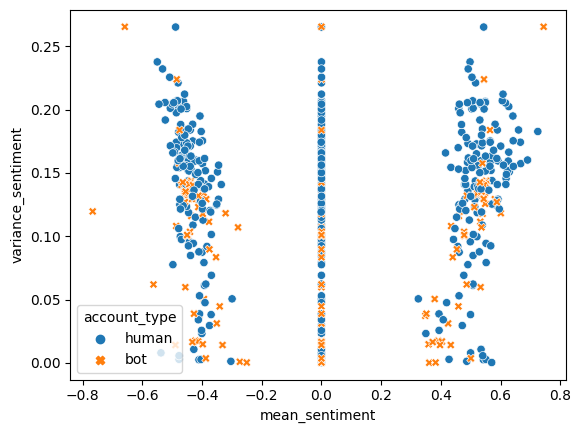

In [21]:
sns.scatterplot(data = df_mean_var_w_label, x = "mean_sentiment", y = "variance_sentiment", hue = "account_type", style = "account_type")

<AxesSubplot:xlabel='account_type', ylabel='mean_sentiment'>

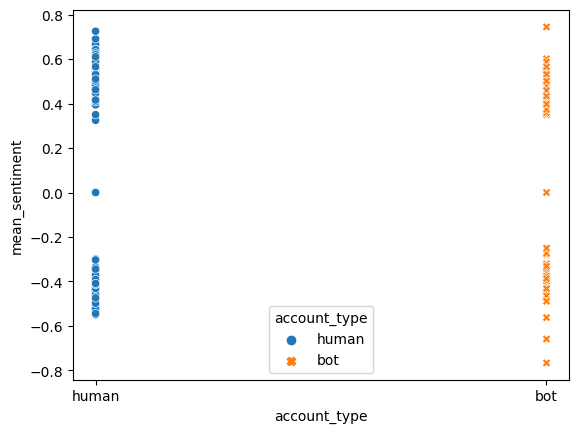

In [22]:
sns.scatterplot(data = df_mean_var_w_label, x = "account_type", y = "mean_sentiment", hue = "account_type", style = "account_type")

<AxesSubplot:xlabel='account_type', ylabel='variance_sentiment'>

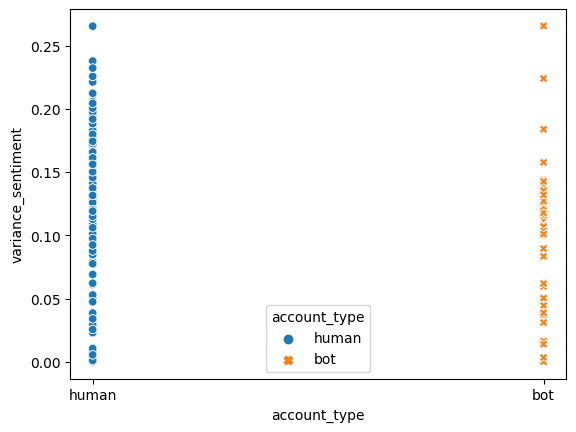

In [23]:
sns.scatterplot(data = df_mean_var_w_label, x = "account_type", y = "variance_sentiment", hue = "account_type", style = "account_type")

In [24]:
df.head()

,userid,account_type,clean_tweet,vader_sentiment,vader_label
0,787405734442958848,bot,"We can put the ""River"" in ""Screwdrivers"" https...",0.0,neutral
1,787405734442958848,bot,"You can't extract the ""Pong"" from ""Sponged"" ht...",0.0,neutral
2,787405734442958848,bot,"Put the ""Nope"" back in ""Inoperative"" https://t...",0.0,neutral
3,787405734442958848,bot,"We can't spell ""Artworks"" without ""Two"" https:...",0.0,neutral
4,787405734442958848,bot,"You can be the ""She"" in ""Astonished"" https://t...",0.0,neutral


In [25]:
def get_url_flag(in_tweet):
    m = re.search(r"http[a-zA-Z0-9/\-.:%]+", in_tweet)
    rtn = False
    if m:
        rtn = True
    return rtn

In [26]:
%%time
df['url_flag'] = df['clean_tweet'].apply(get_url_flag)

CPU times: user 1.4 s, sys: 7.89 ms, total: 1.41 s
Wall time: 1.46 s


In [27]:
df

,userid,account_type,clean_tweet,vader_sentiment,vader_label,url_flag
0,787405734442958848,bot,"We can put the ""River"" in ""Screwdrivers"" https...",0.0000,neutral,True
1,787405734442958848,bot,"You can't extract the ""Pong"" from ""Sponged"" ht...",0.0000,neutral,True
2,787405734442958848,bot,"Put the ""Nope"" back in ""Inoperative"" https://t...",0.0000,neutral,True
3,787405734442958848,bot,"We can't spell ""Artworks"" without ""Two"" https:...",0.0000,neutral,True
4,787405734442958848,bot,"You can be the ""She"" in ""Astonished"" https://t...",0.0000,neutral,True
...,...,...,...,...,...,...
488632,3077047801,bot,A Tribute – Joan Rivers on Fitness http://t.co...,0.2732,positive,True
488633,3077047801,bot,Live in Orlando area? Want a personal trainer?...,0.1680,positive,False
488634,3077047801,bot,If you're trying to get fit keep working. You...,0.8608,positive,True
488635,3077047801,bot,Ready for summer? Cheap cool sunglasses - loo...,0.7430,positive,True


In [28]:
df.iloc[488632]['clean_tweet']

'A Tribute – Joan Rivers on Fitness http://t.co/eZQVBugIC2 via @fittipdaily'

In [29]:
df.iloc[488633]['clean_tweet']

'Live in Orlando area? Want a personal trainer? This woman knows her stuff &amp; priced right: @mytrainertracey  #personaltrainer #healthyliving'

In [30]:
df.groupby(['account_type'])['url_flag'].value_counts()

account_type  url_flag
bot           True         68899
              False        47947
human         False       202148
              True        169643
Name: url_flag, dtype: int64

In [31]:
print(68899 / (68899+47947))
print(169643 / (169643 + 202148))

0.5896564709104292
0.4562859240810025


In [32]:
df['len'] = df['clean_tweet'].apply(len)

In [33]:
df.groupby(['account_type'])['len'].mean()

account_type
bot      111.761455
human    109.129188
Name: len, dtype: float64

In [34]:
df

,userid,account_type,clean_tweet,vader_sentiment,vader_label,url_flag,len
0,787405734442958848,bot,"We can put the ""River"" in ""Screwdrivers"" https...",0.0000,neutral,True,64
1,787405734442958848,bot,"You can't extract the ""Pong"" from ""Sponged"" ht...",0.0000,neutral,True,67
2,787405734442958848,bot,"Put the ""Nope"" back in ""Inoperative"" https://t...",0.0000,neutral,True,60
3,787405734442958848,bot,"We can't spell ""Artworks"" without ""Two"" https:...",0.0000,neutral,True,63
4,787405734442958848,bot,"You can be the ""She"" in ""Astonished"" https://t...",0.0000,neutral,True,60
...,...,...,...,...,...,...,...
488632,3077047801,bot,A Tribute – Joan Rivers on Fitness http://t.co...,0.2732,positive,True,74
488633,3077047801,bot,Live in Orlando area? Want a personal trainer?...,0.1680,positive,False,143
488634,3077047801,bot,If you're trying to get fit keep working. You...,0.8608,positive,True,138
488635,3077047801,bot,Ready for summer? Cheap cool sunglasses - loo...,0.7430,positive,True,133


In [36]:
clf = RandomForestClassifier(random_state=0)

In [37]:
X = df[['vader_sentiment', 'url_flag', 'len']]
y = df['account_type']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
clf = clf.fit(X_train, y_train)

In [40]:
pred = clf.predict(X_test)

In [41]:
labels = ['bot', 'human']

In [42]:
print(classification_report(y_test, y_pred = pred, labels = labels))

              precision    recall  f1-score   support

         bot       0.54      0.24      0.33     38217
       human       0.80      0.93      0.86    123034

    accuracy                           0.77    161251
   macro avg       0.67      0.59      0.60    161251
weighted avg       0.74      0.77      0.74    161251

